In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os

import excursion
import excursion.testcases.fast as scandetails
import excursion.optimize
import numpy as np
import datetime

import excursion.plotting.twodim as plots
import excursion.utils as utils

np.warnings.filterwarnings('ignore')

/usr/lib/python3/dist-packages/numpy/lib/index_tricks.py:184: ComplexWarning: Casting complex values to real discards the imaginary part
  nn[k] = (nn[k]*step+start)


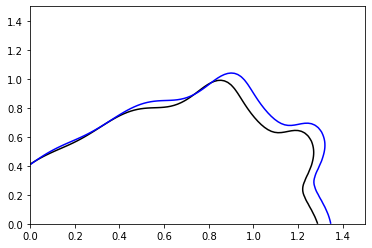

In [3]:

grid = ix,iy = scandetails.plotG
X = excursion.utils.mesh2points(grid,scandetails.plot_rangedef[:,2])

functions = [
    scandetails.truth,
    lambda X: scandetails.truth(X-0.05)
]


scandetails.truth_functions = functions


truthv = excursion.utils.values2mesh(
    scandetails.truth(X),
    scandetails.plot_rangedef,
    scandetails.invalid_region
)

contours = []
for truth_func in scandetails.truth_functions:
    contours.append(
        excursion.utils.values2mesh(
            truth_func(X),
            scandetails.plot_rangedef,
            scandetails.invalid_region
        )
    )


for cont,c in zip(contours, ['k','b']):
    plt.contour(ix,iy,cont, levels = [0], colors=[c])

In [4]:
#initialize it...
N_INIT  = 5
N_FUNCS = 2

np.random.seed(1)
X = np.random.uniform(scandetails.plot_rangedef[:,0],scandetails.plot_rangedef[:,1], size = (N_INIT,2))
y_list = [np.array([scandetails.truth_functions[i](np.asarray([x]))[0] for x in X]) for i in range(N_FUNCS)]

mll -15.994428125420631
mll -16.3160083859077


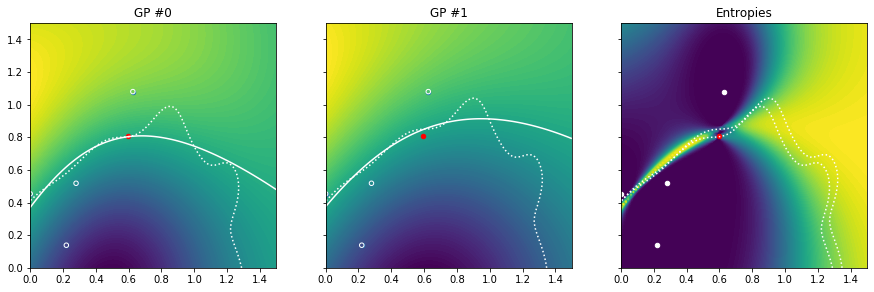

In [5]:
gps = [excursion.get_gp(X,y_list[i]) for i in range(N_FUNCS)]
fig, axarr = plt.subplots(1, 3, sharey=True)
fig.set_size_inches(15, 4.5)
plots.plot(axarr,gps,X,y_list,scandetails)
# plt.savefig(os.path.join(workdir,'update_{}.png'.format(str(index).zfill(3))))
plt.show()

In [6]:
import time

N_UPDATES = 50

workdir = datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S-2dmulti')
os.mkdir(workdir)

for index in range(N_UPDATES):
    start = time.process_time()
    gps = [excursion.get_gp(X,y_list[i]) for i in range(N_FUNCS)]

    fig, axarr = plt.subplots(1, 3, sharey=True)
    fig.set_size_inches(4.5, 1.5)
    plots.plot(axarr,gps,X,y_list,scandetails)
    plt.savefig(os.path.join(workdir,'update_{}.png'.format(str(index).zfill(3))))
    plt.show()

    newx, acqvals = excursion.optimize.gridsearch(gps, X, scandetails)
    print('TIME TAKEN**', time.process_time() - start)
    print('new x: {}'.format(newx))
    newy_list = [scandetails.truth_functions[i](np.asarray([newx]))[0] for i in range(N_FUNCS)]
    for i,newy in enumerate(newy_list):
        print('new y i: {} {}'.format(i,newy))
        y_list[i] = np.concatenate([y_list[i],[newy]])
    X = np.concatenate([X,np.array([newx])])




mll -15.994428125420631
mll -16.3160083859077
info_gain
taking new x. best non-existent index 0 [1.1625 0.8625]
TIME TAKEN** 187.82096288999998
new x: [1.1625 0.8625]
new y i: 0 1.690264607289616
new y i: 1 1.617973722142597
mll -18.870864649235248
mll -19.030430789662805
info_gain
taking new x. best non-existent index 0 [1.35  0.525]
TIME TAKEN** 205.164373258
new x: [1.35  0.525]
new y i: 0 2.0665786738287446
new y i: 1 0.6553082265833616
mll -21.581885719638237
mll -21.665677084454792
info_gain
taking new x. best non-existent index 0 [1.3875 0.2625]
TIME TAKEN** 213.25867802800002
new x: [1.3875 0.2625]
new y i: 0 3.8363073019117975
new y i: 1 2.3912878900409535
mll -23.615457299419315
mll -24.590401770312052
info_gain
taking new x. best non-existent index 0 [1.125  0.7125]
TIME TAKEN** 218.72760992999997
new x: [1.125  0.7125]
new y i: 0 0.7629367770469204
new y i: 1 0.2011542647726099
mll -24.225784243951775
mll -25.67806158630946
info_gain
taking new x. best non-existent index 0 

KeyboardInterrupt: 

In [7]:
scandetails.acqX.shape

(1681, 2)

In [8]:
41**2

1681